This notebook will be used to determine parameters for the numerical solution which reproduce the analytical solution. 

In [1]:
import numpy as np
import functions as f
import matplotlib.pyplot as plt

In [9]:
# Plotting parameters
save_fig = True

In [3]:
# Nt_gaps = 10000    # number of timesteps
# T = 60             # Time to get to heart

# Nx_spaces = 800;   # number of spaces in x

# # # Play around with these values until the Cf reaches 
# L1 = -10; # Distance behind 0 reference point
# L2 = 25 # Distance in front  0 reference point

Nt_gaps = 7500    # number of timesteps
T = 60             # Time to get to heart

Nx_spaces = 800;   # number of spaces in x

# # Play around with these values until the Cf reaches 
L1 = -10; # Distance behind 0 reference point
L2 = 25 # Distance in front  0 reference point


D = 0.1
v = 0.2
heart_loc = 12

C0 = 8.71346e-3 # This was our analytical solution 
Cf_desired = 1e-3 # The desired final concentration


# # # Check the conditions
# C = D*dt/(dx**2)
# A = v*dt/(2*dx)


# Run Forward Euler:
Cf, U, x, t, C, A = f.forward_euler(Nt_gaps, Nx_spaces, L1, L2, C0=C0, T=60, D=D, v=v, b0=0, bL=0, x_heart=heart_loc)

diff = abs(Cf - Cf_desired)

# Check our conditions:
print(f'C = {C}, A = {A}')

print(f'Cf = {Cf}')

print(f'Difference between Cf and desired Cf: {diff}')

C = 0.417959183673483, A = 0.018285714285714582
Cf = 0.0010069850968658274
Difference between Cf and desired Cf: 6.985096865827359e-06


In [4]:
# Run Backward Euler:

# Find new parameters which produce results as in Analytical Solution.

Nt_gaps = 800    # number of timesteps
T = 60             # final time 

Nx_spaces = 800;   # number of spaces in x
L1 = -10; # Distance behind 0 reference point
L2 = 25 # Distance in front  0 reference point
C0 = 8.713e-3
D = 0.1
heart_loc = 12

Cf_backwards, U_backwards, x_backwards, t_backwards = f.backward_euler(Nt_gaps, Nx_spaces, L1, L2, C0, T=60, D=D, v=v, b0=0, bL=0, x_heart=heart_loc)

diff = abs(Cf_backwards - Cf_desired)


print(f'Cf = {Cf_backwards}')

print(f'Difference between Cf and desired Cf: {diff}')

Cf = 0.0009992354070729392
Difference between Cf and desired Cf: 7.645929270608514e-07


### Conclusion between Forward and Backward Euler:

We observe the Forward and Backward Euler methods obtaining a very similar result with the same input conditions. Backward Euler requires far smaller step sizes to produce same/similar results. Forward Euler is faster but has stability concerns. Continue with Backward Euler.


We obtained parameters, L1, L2, Nx_spaces, and Nt_spaces which provide the same result as the analytical solution and will be used in the future analysis. 

### Plot the results

Time = 0

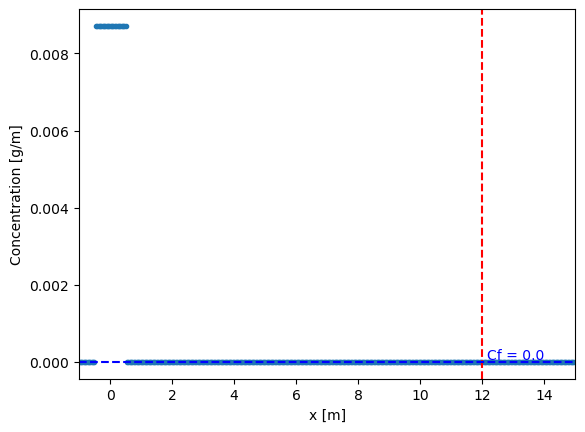

In [10]:
fig, ax = plt.subplots()
f.concentration_x_plot(x_backwards, U_backwards[:,0], C0, heart_loc, t_str='$t_{0}$', ax=ax)

y_limits = ax.get_ylim()

if save_fig:
    plt.savefig("images/concentration_t0.eps", format="eps")

Time = end

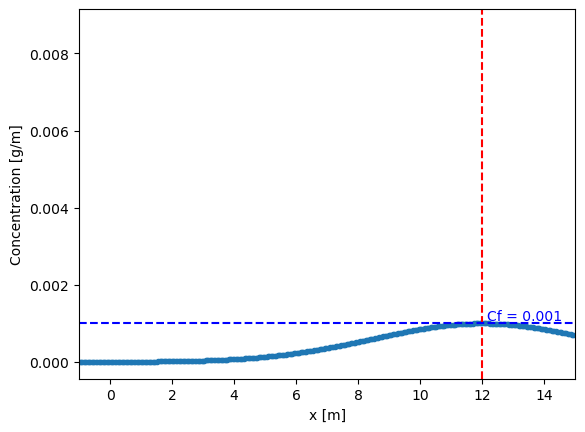

In [11]:
fig, ax = plt.subplots()
f.concentration_x_plot(x_backwards, U_backwards[:,-1], C0, heart_loc, t_str='$t_{60}$', ax=ax, ylims=y_limits)
# f.concentration_x_plot(x, U[:,0], C0, heart_loc, t_str='$t_{60}$', ax=ax)

# plt.show()


if save_fig:
    plt.savefig("images/concentration_t_end.eps", format="eps")

Plot many time locations on one figure

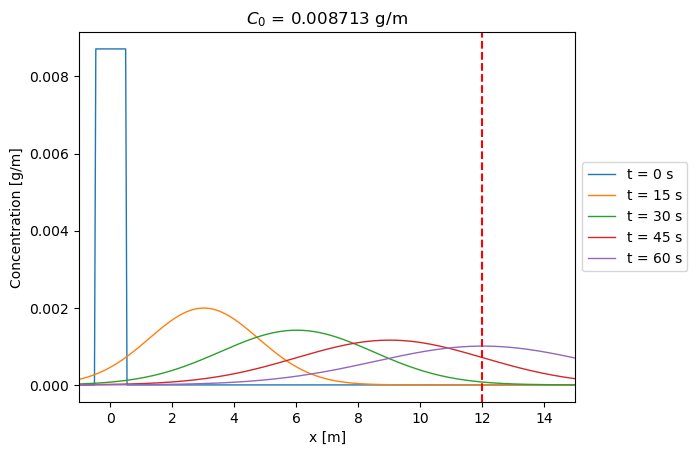

<Figure size 640x480 with 0 Axes>

In [12]:
delta_t = 15
t_to_plot = np.arange(0, 60 + delta_t, delta_t)

heart_loc = 12
index_closest = (np.abs(x - heart_loc)).argmin()
C_heart = U[index_closest,-1]


fig, ax = plt.subplots()
for tt in t_to_plot:
    index_closest = (np.abs(t - tt)).argmin()
    ax.plot(x, U[:, index_closest], '-', linewidth = 1, label=f't = {tt} s')
    
    # if tt == 60:
    #     ax.axhline(y=C_heart, color='b', linestyle='--', label= f'Cf = {round(C_heart, 4)}')
    #     ax.text(x=12, y=C_heart, s=f'Cf = {round(C_heart, 4)}', color='b', va='bottom', ha='left')
    
ax.set_xlabel('x [m]')
ax.set_ylabel('Concentration [g/m]')
ax.set_xlim([-1,15])

# ax.legend() 
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

ax.axvline(x=heart_loc, color='r', linestyle='--')

title_str = f'$C_0$ = {C0} g/m'
ax.set_title(title_str)

plt.show()

if save_fig:
    plt.savefig("images/concentration_over_time.eps", format="eps")
    